Epoch 1/10
75/75 [==============================] - 5s 58ms/step - loss: 0.6104 - accuracy: 0.7679 - val_loss: 0.3458 - val_accuracy: 0.8250
Epoch 2/10
75/75 [==============================] - 4s 51ms/step - loss: 0.2665 - accuracy: 0.8975 - val_loss: 0.2079 - val_accuracy: 0.9283
Epoch 3/10
75/75 [==============================] - 4s 48ms/step - loss: 0.1303 - accuracy: 0.9592 - val_loss: 0.1438 - val_accuracy: 0.9517
Epoch 4/10
75/75 [==============================] - 4s 53ms/step - loss: 0.0910 - accuracy: 0.9708 - val_loss: 0.1466 - val_accuracy: 0.9467
Epoch 5/10
75/75 [==============================] - 4s 54ms/step - loss: 0.0644 - accuracy: 0.9846 - val_loss: 0.0982 - val_accuracy: 0.9733
Epoch 6/10
75/75 [==============================] - 4s 55ms/step - loss: 0.0398 - accuracy: 0.9892 - val_loss: 0.0992 - val_accuracy: 0.9750
Epoch 7/10
75/75 [==============================] - 4s 51ms/step - loss: 0.0441 - accuracy: 0.9867 - val_loss: 0.0814 - val_accuracy: 0.9883
Epoch 8/10
75

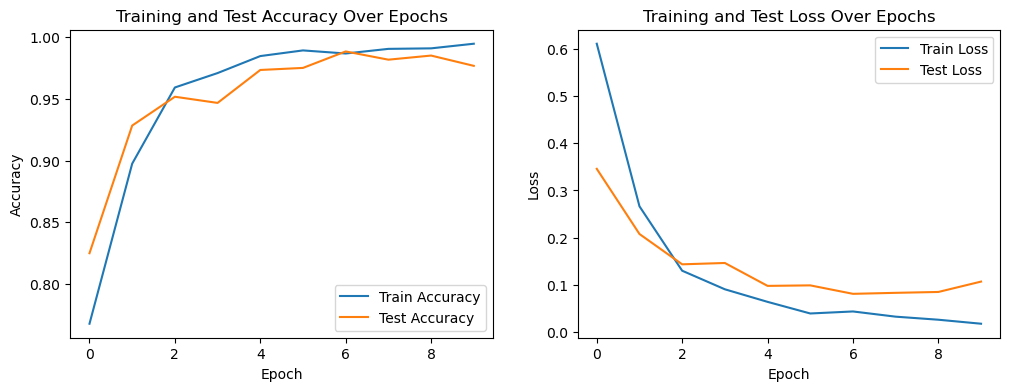

19/19 [==============================] - 0s 15ms/step - loss: 0.1073 - accuracy: 0.9767
Test Loss: 0.1073
Test Accuracy: 0.9767
19/19 [==============================] - 0s 14ms/step
Precision: 0.9857
Recall: 0.9650
Confusion Matrix:
[[310   4]
 [ 10 276]]


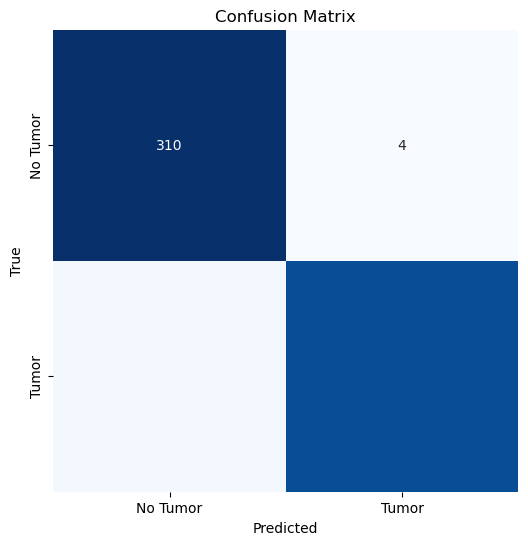

In [7]:
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns

# Set your image directory
image_dir = '/Users/tigulladeepika/Downloads/archive/'

# Load image file names for 'no' and 'yes' classes
no_tumor_images = os.listdir(image_dir + '/no')
yes_tumor_images = os.listdir(image_dir + '/yes')

dataset = []
label = []

# Load 'no' class images
for i, image_name in enumerate(no_tumor_images):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(image_dir + 'no/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((128, 128))
        dataset.append(np.array(image))
        label.append(0)

# Load 'yes' class images
for i, image_name in enumerate(yes_tumor_images):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(image_dir + 'yes/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((128, 128))
        dataset.append(np.array(image))
        label.append(1)

# Convert lists to NumPy arrays and normalize pixel values
dataset = np.array(dataset) / 255.0
label = np.array(label)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=.2)

# Build the CNN model
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
cnn.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

# Train the model and store the history
history = cnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Visualize accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Rest of the code remains unchanged

# Evaluate the model
loss, accuracy = cnn.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Predict on test data
y_pred = cnn.predict(x_test)
y_pred_classes = np.round(y_pred)

# Calculate Precision, Recall, and Confusion Matrix
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


The length of no tumor images is 1500
The length of yes tumor images is 1500
Epoch 1/10
75/75 [==============================] - 30s 402ms/step - loss: 0.4630 - accuracy: 0.7663 - val_loss: 0.2958 - val_accuracy: 0.8817
Epoch 2/10
75/75 [==============================] - 30s 399ms/step - loss: 0.1979 - accuracy: 0.9304 - val_loss: 0.1658 - val_accuracy: 0.9383
Epoch 3/10
75/75 [==============================] - 30s 403ms/step - loss: 0.0847 - accuracy: 0.9737 - val_loss: 0.1016 - val_accuracy: 0.9667
Epoch 4/10
75/75 [==============================] - 30s 403ms/step - loss: 0.0438 - accuracy: 0.9879 - val_loss: 0.1190 - val_accuracy: 0.9550
Epoch 5/10
75/75 [==============================] - 30s 399ms/step - loss: 0.0240 - accuracy: 0.9933 - val_loss: 0.0881 - val_accuracy: 0.9800
Epoch 6/10
75/75 [==============================] - 30s 399ms/step - loss: 0.0074 - accuracy: 0.9967 - val_loss: 0.0861 - val_accuracy: 0.9817
Epoch 7/10
75/75 [==============================] - 30s 400ms/ste

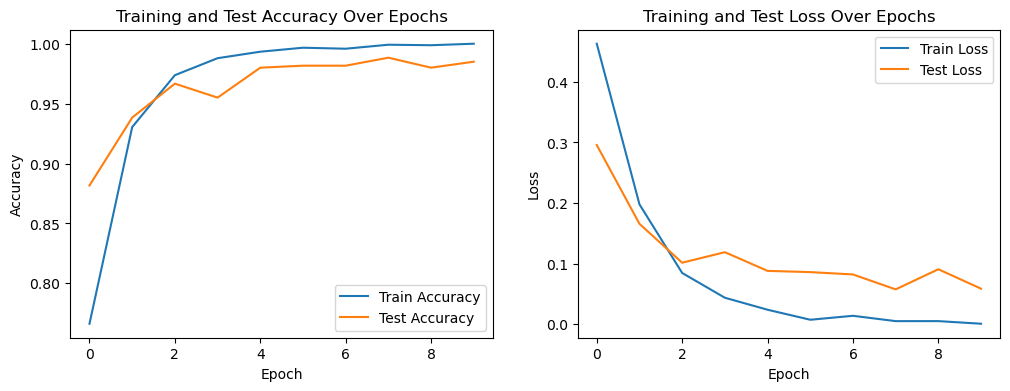

19/19 [==============================] - 2s 91ms/step
Precision: 0.9882
Recall: 0.9767
Confusion Matrix:
[[340   3]
 [  6 251]]


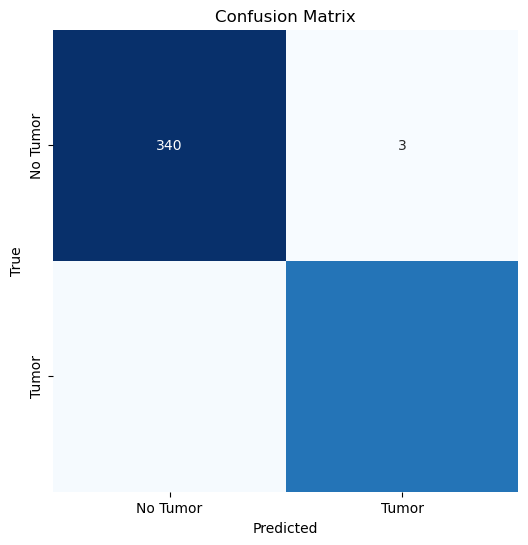

In [3]:
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

# Set your image directory
image_dir = '/Users/tigulladeepika/Downloads/archive/'
no_tumor_images = os.listdir(os.path.join(image_dir, 'no'))
yes_tumor_images = os.listdir(os.path.join(image_dir, 'yes'))

print('The length of no tumor images is', len(no_tumor_images))
print('The length of yes tumor images is', len(yes_tumor_images))

dataset = []
label = []

# Load 'no' tumor images
for image_name in no_tumor_images:
    if image_name.split('.')[-1] == 'jpg':
        image_path = os.path.join(image_dir, 'no', image_name)
        image = cv2.imread(image_path)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((128, 128))
        dataset.append(np.array(image))
        label.append(0)

# Load 'yes' tumor images
for image_name in yes_tumor_images:
    if image_name.split('.')[-1] == 'jpg':
        image_path = os.path.join(image_dir, 'yes', image_name)
        image = cv2.imread(image_path)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((128, 128))
        dataset.append(np.array(image))
        label.append(1)

dataset = np.array(dataset)
label = np.array(label)

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define a custom symbolic reasoning layer
class SymbolicReasoningLayer(layers.Layer):
    def __init__(self, num_classes):
        super(SymbolicReasoningLayer, self).__init__()
        self.num_classes = num_classes

    def build(self, input_shape):
        # Define your symbolic reasoning weights and biases
        self.weights_symbolic = self.add_weight(shape=(input_shape[-1], self.num_classes),
                                                initializer='random_normal',
                                                trainable=True,
                                                name='weights_symbolic')
        self.bias_symbolic = self.add_weight(shape=(self.num_classes,),
                                             initializer='zeros',
                                             trainable=True,
                                             name='bias_symbolic')

    def call(self, inputs):
        # Perform symbolic reasoning
        reasoning_output = tf.matmul(inputs, self.weights_symbolic) + self.bias_symbolic
        return reasoning_output

# Create a CNN model with symbolic reasoning
model = Sequential([
    SymbolicReasoningLayer(64),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    SymbolicReasoningLayer(64),  # Adjust the number of units based on your requirements
    layers.Activation('relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Print symbolic reasoning weights and biases
symbolic_layer = model.layers[0]  # Assuming the SymbolicReasoningLayer is the first layer
symbolic_weights = symbolic_layer.get_weights()

if symbolic_weights:
    print("\nSymbolic Reasoning Weights:")
    print(symbolic_weights[0])
    print("\nSymbolic Reasoning Biases:")
    print(symbolic_weights[1])
else:
    print("\nSymbolic Reasoning layer has no weights.")

# Visualize accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Predict on test data
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)

# Calculate Precision, Recall, and Confusion Matrix
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


The length of no tumor images is 1500
The length of yes tumor images is 1500
Epoch 1/10
75/75 [==============================] - 8s 100ms/step - loss: 0.8975 - accuracy: 0.7775 - val_loss: 0.3242 - val_accuracy: 0.8817
Epoch 2/10
75/75 [==============================] - 8s 102ms/step - loss: 0.2308 - accuracy: 0.9133 - val_loss: 0.1942 - val_accuracy: 0.9233
Epoch 3/10
75/75 [==============================] - 7s 99ms/step - loss: 0.1175 - accuracy: 0.9621 - val_loss: 0.1386 - val_accuracy: 0.9600
Epoch 4/10
75/75 [==============================] - 7s 99ms/step - loss: 0.0723 - accuracy: 0.9796 - val_loss: 0.1240 - val_accuracy: 0.9650
Epoch 5/10
75/75 [==============================] - 7s 98ms/step - loss: 0.0373 - accuracy: 0.9921 - val_loss: 0.1541 - val_accuracy: 0.9467
Epoch 6/10
75/75 [==============================] - 7s 100ms/step - loss: 0.0216 - accuracy: 0.9946 - val_loss: 0.0954 - val_accuracy: 0.9633
Epoch 7/10
75/75 [==============================] - 7s 98ms/step - loss: 0

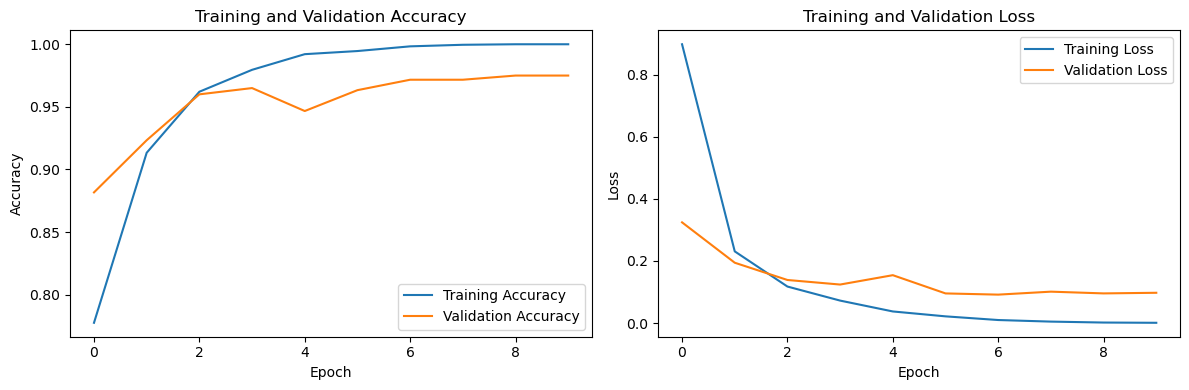

19/19 [==============================] - 1s 26ms/step - loss: 0.0975 - accuracy: 0.9750

Test Loss: 0.0975
Test Accuracy: 0.9750
19/19 [==============================] - 1s 25ms/step
Precision: 0.9618
Recall: 0.9805
Confusion Matrix:
[[333  10]
 [  5 252]]


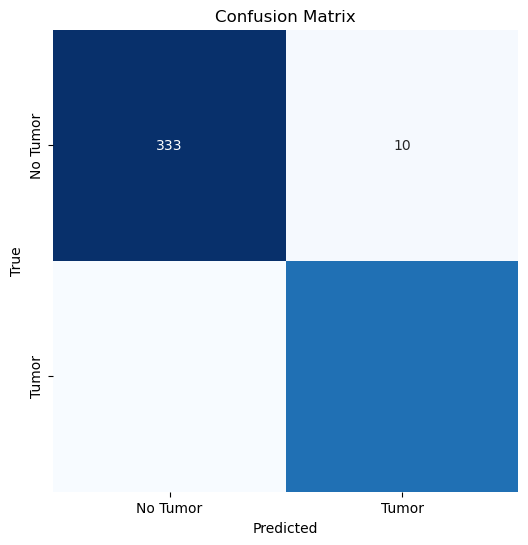

In [9]:
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom symbolic reasoning layer
class SymbolicReasoningLayer(tf.keras.layers.Layer):
    def __init__(self, num_classes):
        super(SymbolicReasoningLayer, self).__init__()
        self.num_classes = num_classes

    def build(self, input_shape):
        # Define your symbolic reasoning weights and biases
        self.weights_symbolic = self.add_weight(shape=(input_shape[-1], self.num_classes),
                                                initializer='random_normal',
                                                trainable=True,
                                                name='weights_symbolic')
        self.bias_symbolic = self.add_weight(shape=(self.num_classes,),
                                             initializer='zeros',
                                             trainable=True,
                                             name='bias_symbolic')

    def call(self, inputs):
        # Perform symbolic reasoning
        reasoning_output = tf.matmul(inputs, self.weights_symbolic) + self.bias_symbolic
        return reasoning_output

# Define the CNN with symbolic reasoning using the create_model function
def create_model(input_shape, num_classes):
    model = Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        SymbolicReasoningLayer(num_classes),
        layers.Activation('linear'),  # Use 'linear' activation for symbolic reasoning layer
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Load your dataset and preprocess it
# For example, you can use the CIFAR-10 dataset
image_dir = '/Users/tigulladeepika/Downloads/archive/'
no_tumor_images = os.listdir(os.path.join(image_dir, 'no'))
yes_tumor_images = os.listdir(os.path.join(image_dir, 'yes'))

print('The length of no tumor images is', len(no_tumor_images))
print('The length of yes tumor images is', len(yes_tumor_images))

dataset = []
label = []

# Load 'no' tumor images
for image_name in no_tumor_images:
    if image_name.split('.')[-1] == 'jpg':
        image_path = os.path.join(image_dir, 'no', image_name)
        image = cv2.imread(image_path)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((128, 128))
        dataset.append(np.array(image))
        label.append(0)

# Load 'yes' tumor images
for image_name in yes_tumor_images:
    if image_name.split('.')[-1] == 'jpg':
        image_path = os.path.join(image_dir, 'yes', image_name)
        image = cv2.imread(image_path)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((128, 128))
        dataset.append(np.array(image))
        label.append(1)

dataset = np.array(dataset)
label = np.array(label)

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the model using the create_model function
input_shape = x_train[0].shape
num_classes = 64  # Adjust the number of units based on your requirements
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

# Print symbolic reasoning weights and biases
symbolic_layer = model.layers[-3]  # Assuming the symbolic reasoning layer is the third-to-last layer
symbolic_weights = symbolic_layer.get_weights()

if symbolic_weights:
    print("\nSymbolic Reasoning Weights:")
    print(symbolic_weights[0])
    print("\nSymbolic Reasoning Biases:")
    print(symbolic_weights[1])
else:
    print("\nSymbolic reasoning layer has no trainable parameters.")

# Visualize accuracy and loss over epochs for both training and test data
plt.figure(figsize=(12, 4))

# Plot training accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Predict on test data
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)

# Calculate Precision, Recall, and Confusion Matrix
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


ValueError: Invalid RGBA argument: 'Violet '

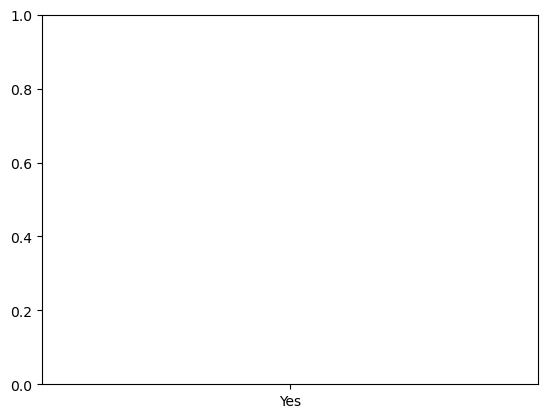

In [11]:
import matplotlib.pyplot as plt

# Data
classes = ['Yes', 'No', 'Validation']
counts = [1500, 1500, 200]

# Plotting
plt.bar(classes, counts, color=['Violet ', 'pink', 'purple'])
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution and Validation Set Size')
plt.show()

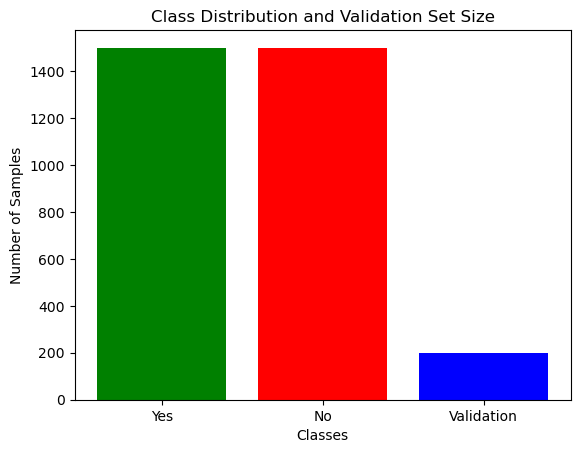

In [12]:
import matplotlib.pyplot as plt

# Data
classes = ['Yes', 'No', 'Validation']
counts = [1500, 1500, 200]

# Plotting
plt.bar(classes, counts, color=['green', 'red', 'blue'])
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution and Validation Set Size')
plt.show()

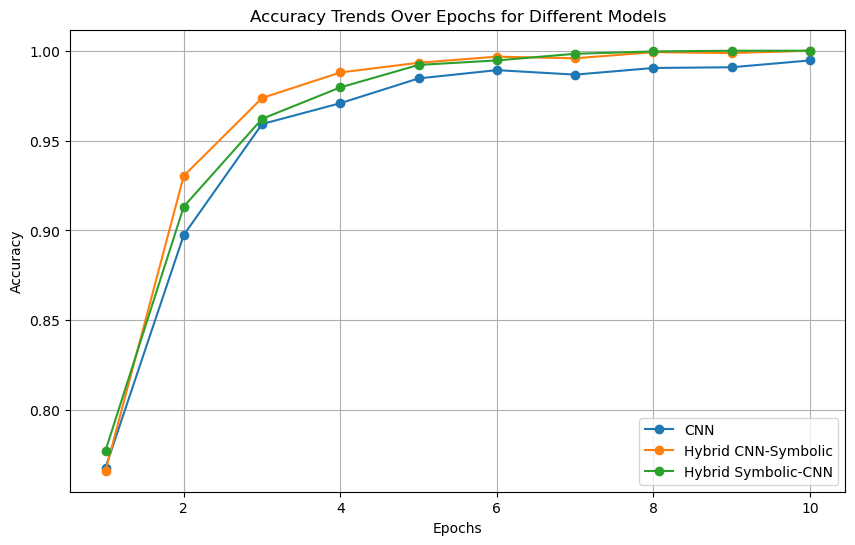

In [13]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(1, 11))

accuracy_cnn = [0.7679, 0.8975, 0.9592, 0.9708, 0.9846, 0.9892, 0.9867, 0.9904, 0.9908, 0.9946]
accuracy_hybrid_cnn_symbolic = [0.7663, 0.9304, 0.9737, 0.9879, 0.9933, 0.9967, 0.9958, 0.9992, 0.9987, 1]
accuracy_hybrid_symbolic_cnn = [0.7775, 0.9133, 0.9621, 0.9796, 0.9921, 0.9946, 0.9983, 0.9996, 1, 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy_cnn, marker='o', label='CNN')
plt.plot(epochs, accuracy_hybrid_cnn_symbolic, marker='o', label='Hybrid CNN-Symbolic')
plt.plot(epochs, accuracy_hybrid_symbolic_cnn, marker='o', label='Hybrid Symbolic-CNN')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Trends Over Epochs for Different Models')
plt.legend()
plt.grid(True)
plt.show()
